In [0]:
#importing requird libraries
import tensorflow as tf
import pandas as pd
import numpy as np
#checking the tensorflow version
print(tf.__version__)

2.2.0-rc2


In [0]:
#defining model 
def build_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [0]:
#model details i.e parameters and hyperparameters
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [0]:
#loading dataset
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [0]:
#compiling model with appropriate functions
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 53s 56ms/step - loss: 0.1754 - accuracy: 0.9451
Epoch 2/5
938/938 [==============================] - 54s 57ms/step - loss: 0.0478 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0326 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 54s 58ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 55s 58ms/step - loss: 0.0195 - accuracy: 0.9942


In [0]:
#evaluating model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0257 - accuracy: 0.9917


In [0]:
#model accuracy on test data
test_acc * 100

99.16999936103821

In [0]:
#preparing validation data from training data
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [0]:
#fitting model for validation
model = build_model()
history = model.fit(partial_x_train,partial_y_train,epochs=2,validation_data=(x_val, y_val))

Epoch 1/2
1563/1563 [==============================] - 54s 34ms/step - loss: 0.0277 - accuracy: 0.9482 - val_loss: 0.0122 - val_accuracy: 0.9794
Epoch 2/2
1563/1563 [==============================] - 54s 35ms/step - loss: 0.0091 - accuracy: 0.9842 - val_loss: 0.0122 - val_accuracy: 0.9805


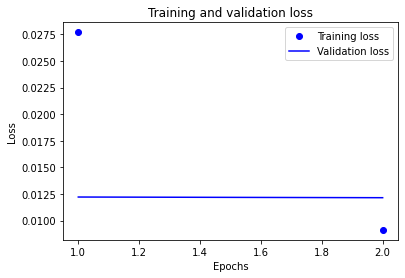

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

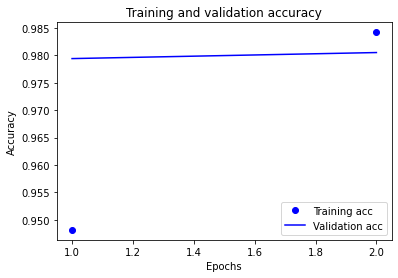

In [0]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

9


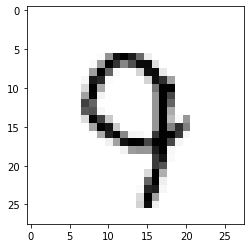

In [0]:
# prediction on unseen data
image_index = 999
plt.imshow(test_images[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))
print('Prediction:',pred.argmax(),'\n Test Image:')

In [58]:
#verify invalid predictions between  given range
invalid_pred = 0
for x in range(0,1000):
    prediction =  model.predict(test_images[x].reshape(1, 28, 28, 1))
    if(prediction.argmax() != test_labels[x].argmax() ):
      invalid_pred += 1

print(invalid_pred)

24
